## Loader les données

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import PlaintextCorpusReader
from os import path
import glob

#can be removed
from jupyterthemes import jtplot
jtplot.style()

In [159]:
if not path.exists("raw_data.csv"):
    data_path = "reddit-dataset/data"
    all_files = glob.glob(data_path + "/*.csv")
    li = []
    for filename in all_files:
        df = pd.read_csv(filename, index_col=None, header=0)
        # only keep x rows per file
        df = df[0:1000]
        li.append(df)

    frame = pd.concat(li, axis=0, ignore_index=True)
    frame.to_csv("raw_data.csv", index=False)


/home/fabrice/.local/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # This is added back by InteractiveShellApp.init_path()


In [160]:
df = pd.read_csv("raw_data.csv")

In [161]:
df

,0,1,10,11,2,3,4,5,6,7,8,9,Unnamed: 0
0,my neighbor has moss on her clitoris,d02ojhe,1.0,NaN,funny,humor,1455673908.0,FLGulf,1.0,0.0,64.0,144312.0,0
1,lettuce not make to many jokes,d02iumx,0.0,NaN,funny,humor,1455665090.0,Looksatducks,1.0,0.0,1.0,48.0,1
2,christopher columbus also sold children as sex...,d02kuqg,0.0,NaN,funny,humor,1455668295.0,Malkalack,2.0,0.0,1478.0,19270.0,2
3,rthathappened,d02uf4u,1.0,NaN,funny,humor,1455683493.0,WadeWilsonforPope,-3.0,0.0,675.0,286907.0,3
4,gt 734 nothing good on huh,d02p7to,0.0,NaN,funny,humor,1455674936.0,JoeyFatts,1.0,0.0,21259.0,23074.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,my parents allegedly grew some weed and allege...,d02avll,0.0,NaN,science,learning,1455654100.0,maxwellmaxwell,1.0,0.0,372.0,5311.0,995
49996,removed,czzjy32,NaN,NaN,science,learning,1455460102.0,[deleted],31.0,0.0,0.0,0.0,996
49997,NaN,463l43,0.0,NaN,science,learning,1455644520.0,RobotJohnson,25.0,0.0,468.0,42.0,997
49998,there s nothing i like hearing more than the p...,d02g194,0.0,NaN,science,learning,1455660965.0,FireNexus,3.0,0.0,223.0,11518.0,998


In [162]:
df = df.rename(columns={"0": "text", "2": "subreddit", "3":"label"})
df

,text,1,10,11,subreddit,label,4,5,6,7,8,9,Unnamed: 0
0,my neighbor has moss on her clitoris,d02ojhe,1.0,NaN,funny,humor,1455673908.0,FLGulf,1.0,0.0,64.0,144312.0,0
1,lettuce not make to many jokes,d02iumx,0.0,NaN,funny,humor,1455665090.0,Looksatducks,1.0,0.0,1.0,48.0,1
2,christopher columbus also sold children as sex...,d02kuqg,0.0,NaN,funny,humor,1455668295.0,Malkalack,2.0,0.0,1478.0,19270.0,2
3,rthathappened,d02uf4u,1.0,NaN,funny,humor,1455683493.0,WadeWilsonforPope,-3.0,0.0,675.0,286907.0,3
4,gt 734 nothing good on huh,d02p7to,0.0,NaN,funny,humor,1455674936.0,JoeyFatts,1.0,0.0,21259.0,23074.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,my parents allegedly grew some weed and allege...,d02avll,0.0,NaN,science,learning,1455654100.0,maxwellmaxwell,1.0,0.0,372.0,5311.0,995
49996,removed,czzjy32,NaN,NaN,science,learning,1455460102.0,[deleted],31.0,0.0,0.0,0.0,996
49997,NaN,463l43,0.0,NaN,science,learning,1455644520.0,RobotJohnson,25.0,0.0,468.0,42.0,997
49998,there s nothing i like hearing more than the p...,d02g194,0.0,NaN,science,learning,1455660965.0,FireNexus,3.0,0.0,223.0,11518.0,998


In [163]:
df = df[["text", "subreddit" ,"label"]]
df

,text,subreddit,label
0,my neighbor has moss on her clitoris,funny,humor
1,lettuce not make to many jokes,funny,humor
2,christopher columbus also sold children as sex...,funny,humor
3,rthathappened,funny,humor
4,gt 734 nothing good on huh,funny,humor
...,...,...,...
49995,my parents allegedly grew some weed and allege...,science,learning
49996,removed,science,learning
49997,NaN,science,learning
49998,there s nothing i like hearing more than the p...,science,learning


In [164]:
df = df[(df["text"] != " removed ") & (df["text"] != " deleted ") & (df["text"] != np.nan)]
df

,text,subreddit,label
0,my neighbor has moss on her clitoris,funny,humor
1,lettuce not make to many jokes,funny,humor
2,christopher columbus also sold children as sex...,funny,humor
3,rthathappened,funny,humor
4,gt 734 nothing good on huh,funny,humor
...,...,...,...
49993,interesting has there every been speculation t...,science,learning
49995,my parents allegedly grew some weed and allege...,science,learning
49997,NaN,science,learning
49998,there s nothing i like hearing more than the p...,science,learning


In [165]:
df =df.dropna()
df

,text,subreddit,label
0,my neighbor has moss on her clitoris,funny,humor
1,lettuce not make to many jokes,funny,humor
2,christopher columbus also sold children as sex...,funny,humor
3,rthathappened,funny,humor
4,gt 734 nothing good on huh,funny,humor
...,...,...,...
49992,anybody got an article that s not behind a pay...,science,learning
49993,interesting has there every been speculation t...,science,learning
49995,my parents allegedly grew some weed and allege...,science,learning
49998,there s nothing i like hearing more than the p...,science,learning


In [166]:
df["label"].value_counts()

lifestyle        7432
gaming           7371
news             6650
television       6567
learning         5996
humor            5424
entertainment    1807
harrypotter       999
comicbooks        999
anime             999
movies            999
Name: label, dtype: int64

In [167]:
labels = pd.get_dummies(df["label"],prefix='cat')
labels

,cat_anime,cat_comicbooks,cat_entertainment,cat_gaming,cat_harrypotter,cat_humor,cat_learning,cat_lifestyle,cat_movies,cat_news,cat_television
0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
49992,0,0,0,0,0,0,1,0,0,0,0
49993,0,0,0,0,0,0,1,0,0,0,0
49995,0,0,0,0,0,0,1,0,0,0,0
49998,0,0,0,0,0,0,1,0,0,0,0


In [168]:
from nltk.stem.snowball import SnowballStemmer
import string
from nltk.corpus import stopwords

In [169]:
class Preprocessor:
    def __init__(self, stem=True, punctuation=True, digit=True):
        self.st = SnowballStemmer("french", ignore_stopwords=True)
        self.punctuations = set(string.punctuation)
        self.stem = stem
        self.punctuation = punctuation
        self.digit = digit
    
    def raw_preprocess(self, token_list):
        new_token_list = []
        for token in token_list:
            is_token_valid = True
            token = token.lower()
            
            # stemming
            if self.stem:
                token = self.st.stem(token)

            # punctuation filtering
            if self.punctuation and token in self.punctuations:
                is_token_valid = False

            # digit filtering
            elif self.digit and token.isdigit():
                is_token_valid = False

            # add token to new sub list
            if is_token_valid:
                new_token_list.append(token)
        return new_token_list
        
    def preprocess_tokens(self, tokens):
        new_tokens = []
        for token_list in tokens:
            new_tokens.append(self.raw_preprocess(token_list))
        return new_tokens
    
def preprocess(tokens):
    preprocessor = Preprocessor()
    return preprocessor.preprocess_tokens(test)

In [170]:
from sklearn.feature_extraction.text import TfidfVectorizer

def identity_tokenizer(text):
    return text

preprocessor = Preprocessor()
vectorizer = TfidfVectorizer(preprocessor=preprocessor.raw_preprocess ,tokenizer=identity_tokenizer)
#vectorizer = TfidfVectorizer(preprocessor=preprocessor.raw_preprocess)
IDF_data = vectorizer.fit_transform(df["text"].values)

In [171]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=26, algorithm='randomized', n_iter=100)
svd.fit(IDF_data)

TruncatedSVD(algorithm='randomized', n_components=26, n_iter=100,
             random_state=None, tol=0.0)

In [172]:
sum(svd.explained_variance_)

0.21540817462777087

In [173]:
SVD_data = svd.transform(IDF_data)

## Même approche que le tp2

Knn

In [174]:
y_data = labels.values

In [175]:
X_data = SVD_data

In [176]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=32)

In [177]:
print(len(X_train))
print(len(X_test))

31670
13573


In [178]:
y_train[2]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=uint8)

In [179]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors=50)
knn_classifier.fit(X_train, y_train)

y_scores = knn_classifier.predict_proba(X_test)

In [180]:
y_pred = knn_classifier.predict(X_test)

In [181]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.03514329919693509

In [182]:
accuracies = []
n_neighbors = []
for i in range (1, 2):
    knn_classifier = KNeighborsClassifier(n_neighbors=i)
    knn_classifier.fit(X_train, y_train)
    y_pred = knn_classifier.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))
    n_neighbors.append(i)

In [183]:
accuracies

[0.49966845944153837]

## Deep learning

In [200]:
data = df["text"].values
data = data[:25000]

25000

In [215]:
y_data = y_data[:25000]

In [201]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras

In [202]:
word_index = {}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

In [203]:
from nltk.util import ngrams
from collections import defaultdict
from os import linesep

def build_voc(corpus):
    
    word_dict = {}

    for document in corpus:
        for word in document:
            if word not in word_dict:
                word_dict[word] = len(word_dict) + 1 # + 1 pcq 0 = padding

    # word_dict_cleaned = {}
    # for key in word_dict:
    #     if word_dict[key] >= 5:
    #         word_dict_cleaned[key] = word_dict[key]

    with open("./vocab.txt", "w") as f:
        for word in word_dict.keys():
            f.write(word + "\n")
        
    return word_dict

In [204]:
def split_items(list_of_strings):
    stripped_strings = []
    for string in list_of_strings:
        stripped_strings.append(string.split(' '))
    return stripped_strings

In [205]:
splited_data = split_items(data)

In [206]:
splited_data[1]

['lettuce', 'not', 'make', 'to', 'many', 'jokes', '']

In [207]:
vocab = build_voc(splited_data)

In [208]:
vocab

{'my': 1,
 'neighbor': 2,
 'has': 3,
 'moss': 4,
 'on': 5,
 'her': 6,
 'clitoris': 7,
 '': 8,
 'lettuce': 9,
 'not': 10,
 'make': 11,
 'to': 12,
 'many': 13,
 'jokes': 14,
 'christopher': 15,
 'columbus': 16,
 'also': 17,
 'sold': 18,
 'children': 19,
 'as': 20,
 'sex': 21,
 'slaves': 22,
 'http': 23,
 'wwwhuffingtonpostcomerickasumcolumbusdayabadidea_b_742708html': 24,
 'rthathappened': 25,
 'gt': 26,
 '734': 27,
 'nothing': 28,
 'good': 29,
 'huh': 30,
 'you': 31,
 'gon': 32,
 'na': 33,
 'eat': 34,
 'the': 35,
 'rest': 36,
 'a': 37,
 'that': 38,
 'well': 39,
 'i': 40,
 'm': 41,
 'glad': 42,
 'op': 43,
 'knows': 44,
 'appropriate': 45,
 'response': 46,
 'while': 47,
 'watching': 48,
 'comedy': 49,
 'top': 50,
 'notch': 51,
 'post': 52,
 'what': 53,
 'do': 54,
 'mean': 55,
 'recently': 56,
 'it': 57,
 's': 58,
 'more': 59,
 'but': 60,
 'publicity': 61,
 'stunt': 62,
 'and': 63,
 'fucking': 64,
 'working': 65,
 'beautifully': 66,
 'like': 67,
 'last': 68,
 'decade': 69,
 'or': 70,
 'so'

In [209]:
vocab_size = len(vocab)
vocab_size

34850

In [210]:
def get_max_sentence_length(corpus):
    return max([len(sentence) for sentence in corpus])

In [211]:
def get_number_vectors(X):
    return [[vocab[word] for word in sentence] for sentence in X]

In [212]:
from keras.preprocessing.text import Tokenizer, one_hot
from keras.preprocessing.sequence import pad_sequences

max_sentence_length = get_max_sentence_length(splited_data)
print("max sentence length: ", max_sentence_length)

def get_padded_sequences(X):
    return pad_sequences(sequences=get_number_vectors(X),
                         padding='post',
                         maxlen=max_sentence_length)

padded_data = get_padded_sequences(splited_data)

max sentence length:  10000


In [216]:
X_train, X_test, y_train, y_test = train_test_split(padded_data, y_data, test_size=0.3, random_state=32)

MemoryError: Unable to allocate array with shape (17500, 10000) and data type int32

In [152]:
model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size + 1, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
model.add(keras.layers.Dense(11, activation=tf.nn.sigmoid))

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, None, 16)          397280    
_________________________________________________________________
global_average_pooling1d_6 ( (None, 16)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_17 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_18 (Dense)             (None, 11)                187       
Total params: 398,011
Trainable params: 398,011
Non-trainable params: 0
_________________________________________________________________


In [153]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['acc'])

In [154]:
x_validation = X_train[:1500]
partial_x_train = X_train[1500:]

y_validation = y_train[:1500]
partial_y_train = y_train[1500:]

In [155]:
sum_y = [0 for i in range(11)]
sum_y

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [156]:
for entry in partial_y_train:
    sum_y = sum_y+ entry
sum_y

array([104, 108, 188, 738, 109, 563, 623, 750, 108, 653, 705])

In [157]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=10,
                   batch_size=1,
                   validation_data=(x_validation, y_validation),
                   verbose=1)

Train on 4649 samples, validate on 1500 samples
Epoch 1/10
4649/4649 [==============================] - 21s 4ms/sample - loss: 2.1706 - acc: 0.1499 - val_loss: 2.1325 - val_acc: 0.1700
Epoch 2/10
4649/4649 [==============================] - 21s 4ms/sample - loss: 2.1465 - acc: 0.1620 - val_loss: 2.1193 - val_acc: 0.1587
Epoch 3/10
4649/4649 [==============================] - 20s 4ms/sample - loss: 2.1265 - acc: 0.1553 - val_loss: 2.0882 - val_acc: 0.1633
Epoch 4/10
4649/4649 [==============================] - 20s 4ms/sample - loss: 2.0895 - acc: 0.1626 - val_loss: 2.0701 - val_acc: 0.1707
Epoch 5/10
4649/4649 [==============================] - 21s 4ms/sample - loss: 2.0464 - acc: 0.1714 - val_loss: 2.0472 - val_acc: 0.1907
Epoch 6/10
4649/4649 [==============================] - 20s 4ms/sample - loss: 2.0091 - acc: 0.1740 - val_loss: 1.9989 - val_acc: 0.1733
Epoch 7/10
4649/4649 [==============================] - 21s 4ms/sample - loss: 1.9775 - acc: 0.1854 - val_loss: 1.9521 - val_acc: 

In [158]:
results = model.evaluate(X_test, y_test)

print(results)

2636/2636 [==============================] - 0s 123us/sample - loss: 1.9037 - acc: 0.2136
[1.903688673546173, 0.21358119]


In [129]:
results

[2.1451422486211174, 0.16274658]

In [139]:
X_test

array([[ 103,    8,   40, ...,    0,    0,    0],
       [  26,    8,   40, ...,    0,    0,    0],
       [ 181, 5781,  163, ...,    0,    0,    0],
       ...,
       [ 105,  271,  107, ...,    0,    0,    0],
       [  35, 2455, 6779, ...,    0,    0,    0],
       [ 598,   97,   74, ...,    0,    0,    0]], dtype=int32)

In [143]:
preds = model.predict_classes(X_test)
pred_dict = {}
for pred in preds:
    if pred not in pred_dict:
        pred_dict[pred] = 1
    else:
        pred_dict[pred] += 1
pred_dict

{7: 2636}

In [146]:
preds = model.predict(X_test)
preds

array([[0.1325269 , 0.14640069, 0.24494636, ..., 0.14075723, 0.81598395,
        0.8672161 ],
       [0.13243839, 0.14630741, 0.24486163, ..., 0.14066464, 0.81607854,
        0.8673052 ],
       [0.13289133, 0.14678189, 0.24529207, ..., 0.1411289 , 0.815605  ,
        0.86685526],
       ...,
       [0.13280365, 0.14669025, 0.2452079 , ..., 0.14103988, 0.8156962 ,
        0.8669426 ],
       [0.13243124, 0.14630094, 0.24485433, ..., 0.14065927, 0.81608343,
        0.8673104 ],
       [0.1328708 , 0.14676043, 0.24527392, ..., 0.14110877, 0.8156254 ,
        0.86687505]], dtype=float32)

In [123]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [124]:
acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(acc)+1)

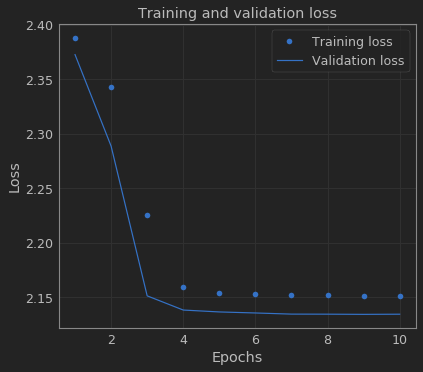

In [125]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

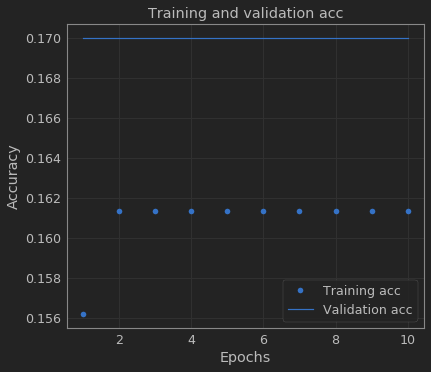

In [126]:
plt.clf()

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()